In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv('/content/Churn_Modelling.csv')#,index_col=0)

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Handling missing values**

In [6]:
data.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Geography vs Exited**

<Axes: xlabel='Geography', ylabel='Exited'>

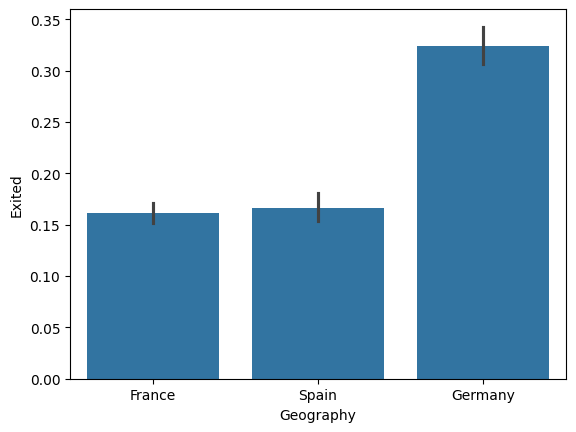

In [8]:
sns.barplot(x=data['Geography'],y=data['Exited'])

 **Histogram of CreditScore**

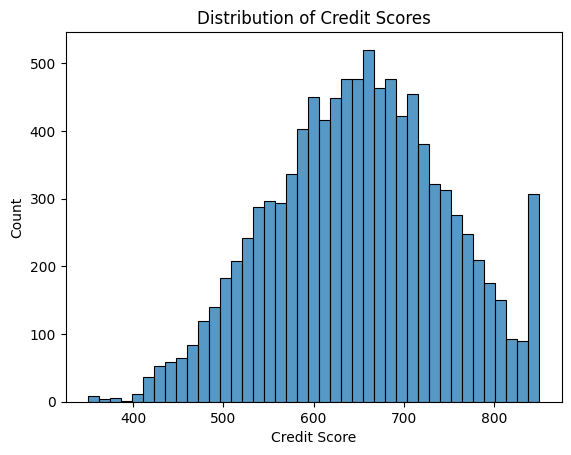

In [9]:
sns.histplot(data, x='CreditScore', kde=False)
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.show()

**CreditScore vs Age**

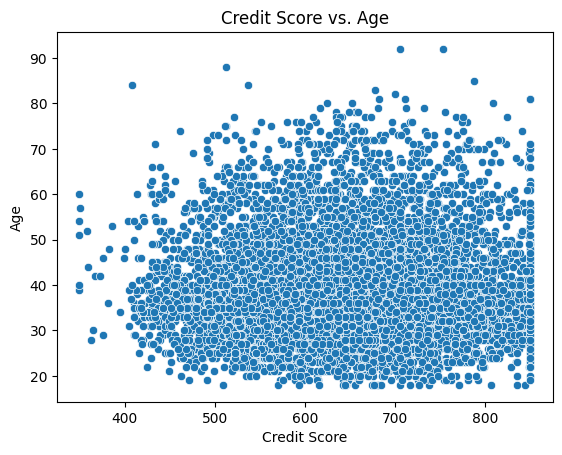

In [10]:
sns.scatterplot(data, x='CreditScore', y='Age')
plt.title('Credit Score vs. Age')
plt.xlabel('Credit Score')
plt.ylabel('Age')
plt.show()

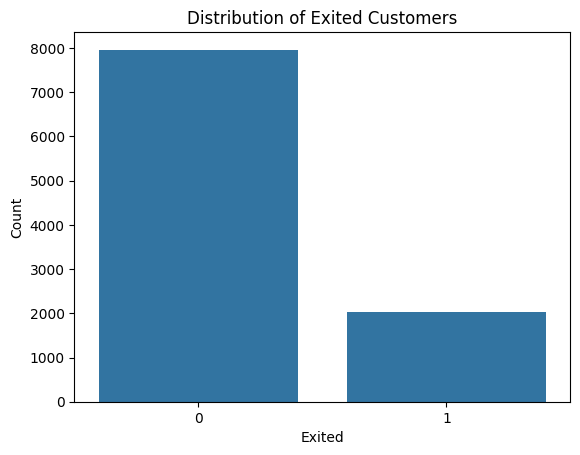

In [11]:
sns.countplot(data, x='Exited')
plt.title('Distribution of Exited Customers')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

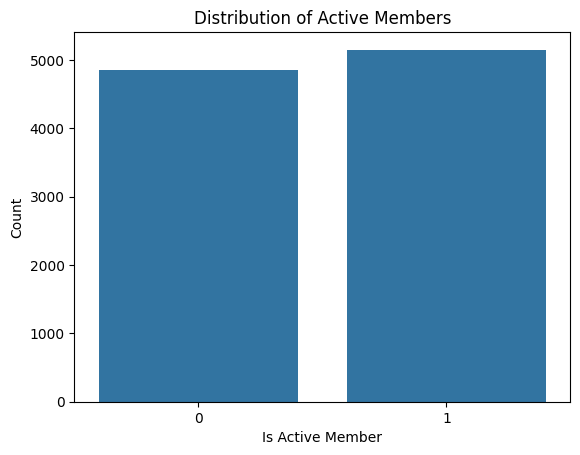

In [12]:
sns.countplot(data, x='IsActiveMember')
plt.title('Distribution of Active Members')
plt.xlabel('Is Active Member')
plt.ylabel('Count')
plt.show()

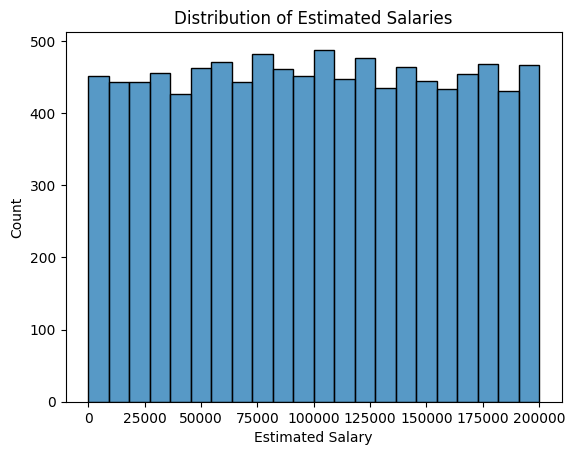

In [13]:
sns.histplot(data, x='EstimatedSalary', kde=False)
plt.title('Distribution of Estimated Salaries')
plt.xlabel('Estimated Salary')
plt.ylabel('Count')
plt.show()

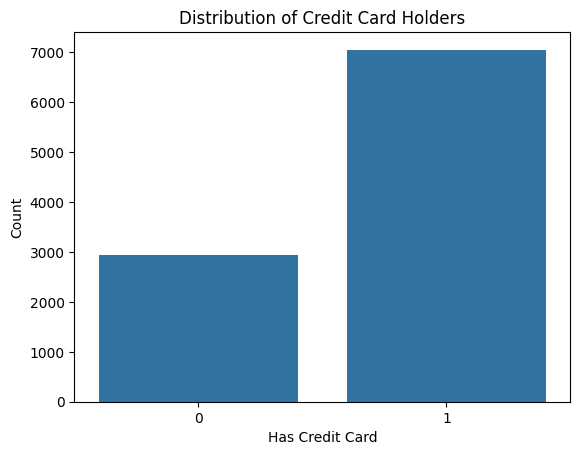

In [14]:
sns.countplot(data, x='HasCrCard')
plt.title('Distribution of Credit Card Holders')
plt.xlabel('Has Credit Card')
plt.ylabel('Count')
plt.show()

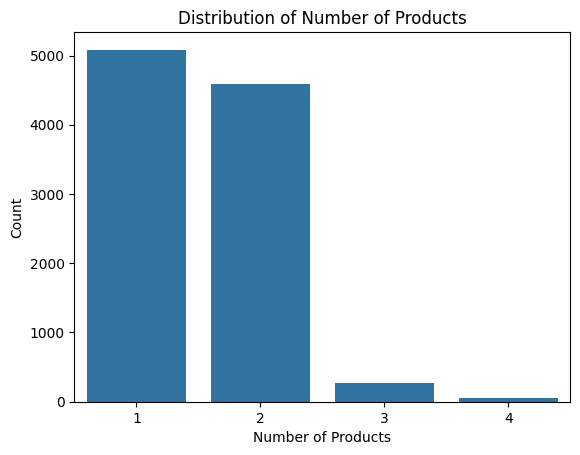

In [15]:
sns.countplot(data, x='NumOfProducts')
plt.title('Distribution of Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.show()

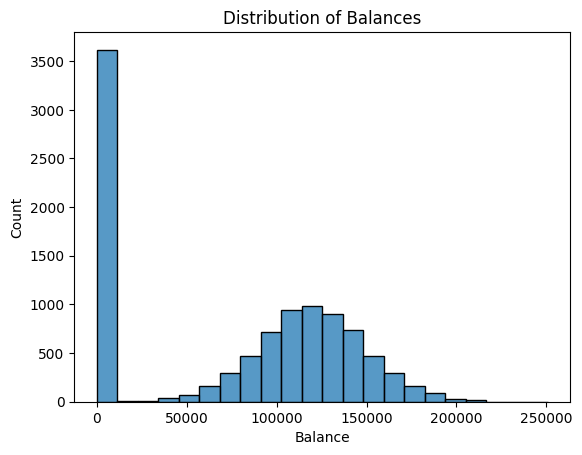

In [16]:
sns.histplot(data, x='Balance', kde=False)
plt.title('Distribution of Balances')
plt.xlabel('Balance')
plt.ylabel('Count')
plt.show()

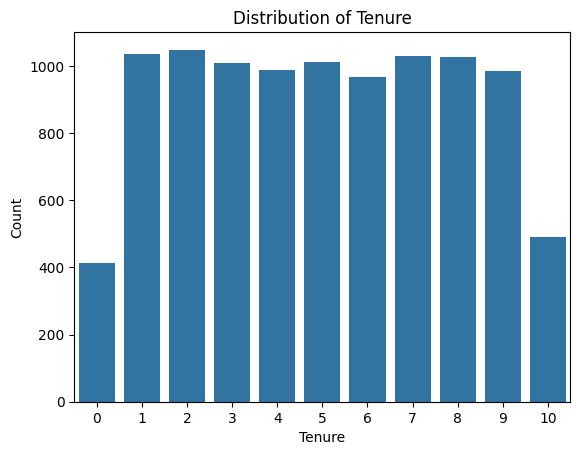

In [17]:
sns.countplot(data, x='Tenure')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show()

In [19]:
data = pd.get_dummies(data, columns=['Gender', 'Surname', 'Geography'], drop_first=True)
data.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zotov,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,...,False,False,False,False,False,False,False,False,False,False
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,...,False,False,False,False,False,False,False,False,False,True
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,...,False,False,False,False,False,False,False,False,False,False
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,...,False,False,False,False,False,False,False,False,False,False
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,...,False,False,False,False,False,False,False,False,False,True


In [20]:
data = data.drop(['RowNumber', 'CustomerId'], axis=1)

In [21]:
X=data.drop('Exited', axis=1)
y=data['Exited']

**Train_Test_Split**

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Logistic Regression**

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
logmodel=LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

In [25]:
predictions=logmodel.predict(X_test)

In [26]:
from sklearn.metrics import classification_report
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.81      0.98      0.89      1607\n           1       0.45      0.07      0.12       393\n\n    accuracy                           0.80      2000\n   macro avg       0.63      0.53      0.51      2000\nweighted avg       0.74      0.80      0.74      2000\n'

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[1573,   34],
       [ 365,   28]])

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.8005

**Random Forest Classifier**

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rndm_model=RandomForestClassifier()
rndm_model.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
predictions=rndm_model.predict(X_test)

In [32]:
from sklearn.metrics import classification_report
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.86      0.98      0.92      1607\n           1       0.81      0.37      0.50       393\n\n    accuracy                           0.86      2000\n   macro avg       0.84      0.67      0.71      2000\nweighted avg       0.85      0.86      0.84      2000\n'

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[1573,   34],
       [ 249,  144]])

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.8585